<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#import" data-toc-modified-id="import-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>import</a></span></li></ul></li><li><span><a href="#读取数据集" data-toc-modified-id="读取数据集-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>读取数据集</a></span></li><li><span><a href="#标准化处理" data-toc-modified-id="标准化处理-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>标准化处理</a></span></li><li><span><a href="#模型" data-toc-modified-id="模型-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>模型</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#svm" data-toc-modified-id="svm-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>svm</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>XGBoost</a></span></li></ul></li><li><span><a href="#评分--混淆矩阵-&amp;-precision_score-&amp;-recall_score" data-toc-modified-id="评分--混淆矩阵-&amp;-precision_score-&amp;-recall_score-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>评分- 混淆矩阵 &amp; precision_score &amp; recall_score</a></span></li><li><span><a href="#评分表格" data-toc-modified-id="评分表格-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>评分表格</a></span><ul class="toc-item"><li><span><a href="#计算评分" data-toc-modified-id="计算评分-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>计算评分</a></span></li><li><span><a href="#ROC曲线" data-toc-modified-id="ROC曲线-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>ROC曲线</a></span><ul class="toc-item"><li><span><a href="#LR" data-toc-modified-id="LR-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>LR</a></span></li><li><span><a href="#SVM" data-toc-modified-id="SVM-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>SVM</a></span></li><li><span><a href="#DecisionTree" data-toc-modified-id="DecisionTree-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>DecisionTree</a></span></li><li><span><a href="#RondomForest" data-toc-modified-id="RondomForest-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>RondomForest</a></span></li><li><span><a href="#XGboost" data-toc-modified-id="XGboost-5.2.5"><span class="toc-item-num">5.2.5&nbsp;&nbsp;</span>XGboost</a></span></li></ul></li></ul></li><li><span><a href="#结果汇总" data-toc-modified-id="结果汇总-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>结果汇总</a></span><ul class="toc-item"><li><span><a href="#汇总" data-toc-modified-id="汇总-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>汇总</a></span></li><li><span><a href="#计算评分" data-toc-modified-id="计算评分-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>计算评分</a></span></li><li><span><a href="#输出" data-toc-modified-id="输出-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>输出</a></span></li></ul></li></ul></div>

任务5：使用网格搜索法对5个模型进行调优（调参时采用五折交叉验证的方式），并进行模型评估，记得展示代码的运行结果。 

时间：2天

## import

In [1]:
import json, io, re, os, time
from datetime import datetime, timedelta
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn

from collections import defaultdict, Counter
%matplotlib inline

In [3]:
# 设置显示行数
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [4]:
import numpy as np
import pandas as pd
import pandas_profiling

# df.profile_report(style={'full_width':True})

# 读取数据集

经过前续处理缺失值后和特征选择后

In [5]:
# train_set.profile_report(style={'full_width':True})

# consfin_avg_limit has 103 (3.1%) zeros	Zeros
# consfin_credit_limit is highly correlated with consfin_avg_limit (ρ = 0.9054651558)	Rejected
# consfin_max_limit has 103 (3.1%) zeros	Zeros
# consume_mini_time_last_1_month has 1457 (43.8%) zeros	Zeros
# consume_top_time_last_1_month has 712 (21.4%) zeros	Zeros
# first_transaction_time_diff_day is highly correlated with first_transaction_day (ρ = 1)	Rejected
# history_fail_fee has 202 (6.1%) zeros	Zeros
# latest_one_month_fail has 2277 (68.5%) zeros	Zeros
# latest_one_month_suc has 1810 (54.4%) zeros	Zeros
# latest_query_day has 36 (1.1%) zeros	Zeros
# latest_query_time_diff_day is highly correlated with latest_query_day (ρ = 0.9999831434)	Rejected
# latest_six_month_loan has 52 (1.6%) zeros	Zeros
# loans_avg_limit has 65 (2.0%) zeros	Zeros
# loans_count is highly correlated with history_suc_fee (ρ = 0.9140065658)	Rejected
# loans_credit_limit has 65 (2.0%) zeros	Zeros
# loans_latest_time_diff_day is highly correlated with loans_latest_day (ρ = 0.9999793714)	Rejected
# loans_max_limit has 65 (2.0%) zeros	Zeros
# loans_overdue_count has 1098 (33.0%) zeros	Zeros
# loans_score is highly correlated with apply_score (ρ = 0.9654417553)	Rejected
# loans_settle_count is highly correlated with loans_count (ρ = 0.9762643316)	Rejected
# max_cumulative_consume_later_1_month is highly skewed (γ1 = 26.38045116)	Skewed
# max_cumulative_consume_later_1_month has 346 (10.4%) zeros	Zeros
# pawns_auctions_trusts_consume_last_1_month has 1617 (48.6%) zeros	Zeros
# pawns_auctions_trusts_consume_last_6_month has 295 (8.9%) zeros	Zeros
# repayment_capability is highly skewed (γ1 = 26.90108787)	Skewed
# take_amount_in_later_12_month_highest has 1092 (32.8%) zeros	Zeros
# trans_amount_3_month is highly skewed (γ1 = 42.33606162)	Skewed
# trans_amount_3_month has 66 (2.0%) zeros	Zeros
# trans_amount_increase_rate_lately is highly skewed (γ1 = 56.87152308)	Skewed
# trans_fail_top_count_enum_last_1_month has 966 (29.0%) zeros	Zeros
# trans_fail_top_count_enum_last_6_month has 69 (2.1%) zeros	Zeros
# trans_top_time_last_1_month is highly correlated with consume_top_time_last_1_month (ρ = 0.9222042013)	Rejected
# trans_top_time_last_6_month is highly correlated with consume_top_time_last_6_month (ρ = 0.926644283)	Rejected


In [9]:
cols_left = ['trans_activity_month', 'trans_activity_day', 'rank_trad_1_month', 
             'top_trans_count_last_1_month', 'avg_price_top_last_12_valid_month', 
             'first_transaction_time_diff_day', 'latest_query_time_diff_day', 
             'loans_latest_time_diff_day', 'take_amount_in_later_12_month_highest', 
             'trans_amount_increase_rate_lately', 'transd_mcc', 'trans_days_interval_filter',
             'trans_days_interval', 'repayment_capability', 'number_of_trans_from_2011', 
             'historical_trans_amount', 'historical_trans_day', 'trans_amount_3_month', 
             'abs', 'avg_price_last_12_month', 'trans_top_time_last_1_month', 'trans_top_time_last_6_month', 
             'consume_top_time_last_1_month', 'consume_top_time_last_6_month', 
             'trans_fail_top_count_enum_last_1_month', 'trans_fail_top_count_enum_last_6_month',
             'trans_fail_top_count_enum_last_12_month', 'consume_mini_time_last_1_month', 
             'max_cumulative_consume_later_1_month', 'pawns_auctions_trusts_consume_last_1_month', 
             'pawns_auctions_trusts_consume_last_6_month', 'first_transaction_day', 'trans_day_last_12_month',
             'apply_score', 'apply_credibility', 'query_sum_count', 'loans_score', 'loans_count', 
             'loans_settle_count', 'loans_overdue_count', 'latest_six_month_loan', 'history_suc_fee', 
             'history_fail_fee', 'latest_one_month_suc', 'latest_one_month_fail', 'loans_long_time', 
             'loans_credit_limit', 'loans_max_limit', 'loans_avg_limit', 'consfin_credit_limit', 
             'consfin_max_limit',
             'consfin_avg_limit', 'latest_query_day', 'loans_latest_day',
            'status']

In [10]:
for col in ['consfin_credit_limit',
 'first_transaction_time_diff_day',
 'latest_query_time_diff_day',
 'loans_count',
 'loans_latest_time_diff_day',
 'loans_score',
 'loans_settle_count',
 'trans_top_time_last_1_month',
 'trans_top_time_last_6_month']:
    cols_left.remove(col)

In [12]:
len(cols_left)

46

In [13]:
train_set = pd.read_csv('train_set.csv', usecols = cols_left )
test_set = pd.read_csv('test_set.csv', usecols = cols_left)

In [14]:
# profile = x_train.profile_report()
# rejected_variables = profile.get_rejected_variables(threshold=0.9)

In [15]:
train_set.head()

,trans_activity_month,trans_activity_day,rank_trad_1_month,top_trans_count_last_1_month,avg_price_top_last_12_valid_month,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,transd_mcc,trans_days_interval_filter,trans_days_interval,repayment_capability,number_of_trans_from_2011,historical_trans_amount,historical_trans_day,trans_amount_3_month,abs,avg_price_last_12_month,consume_top_time_last_1_month,consume_top_time_last_6_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,first_transaction_day,trans_day_last_12_month,apply_score,apply_credibility,query_sum_count,loans_overdue_count,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_credit_limit,loans_max_limit,loans_avg_limit,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,status
0,0.83,0.136,1.00,1.00,0.45,300,0.99,13.0,127.0,95.0,10480,10.0,33830,41.0,4260,830,1300,0.0,15.0,3.0,4.0,4.0,0.0,0,0,6160,434.0,93.0,530.0,78.0,12.0,2.0,3.0,16.0,10.0,0.0,0.0,302.0,2400.0,2800.0,2400.0,0.0,0.0,12.0,164.0,0
1,1.00,0.438,0.30,0.10,0.55,1500,0.72,14.0,6.0,6.0,15790,6.0,100060,79.0,28580,10550,1040,9.0,9.0,2.0,3.0,3.0,267070.0,2800,0,4350,238.0,82.0,545.0,79.0,22.0,2.0,27.0,62.0,19.0,4.0,0.0,351.0,2100.0,4000.0,1992.0,18000.0,7600.0,2.0,2.0,0
2,0.83,0.486,0.25,0.05,0.50,500,0.98,22.0,23.0,15.0,14050,70.0,302720,359.0,63600,650,1140,10.0,15.0,2.0,10.0,10.0,852.0,2390,1160,52310,2631.0,82.0,524.0,80.0,24.0,9.0,14.0,64.0,42.0,1.0,0.0,354.0,2100.0,3700.0,1725.0,12000.0,8614.0,6.0,67.0,0
3,0.68,0.555,0.20,0.05,0.50,0,0.82,18.0,7.0,7.0,11880,26.0,367680,267.0,64150,6260,1090,7.0,7.0,2.0,2.0,5.0,501194.0,2030,1230,43930,1229.0,82.0,540.0,78.0,7.0,1.0,6.0,47.0,3.0,0.0,0.0,348.0,1600.0,2300.0,1362.0,13200.0,8800.0,25.0,110.0,0
4,0.88,0.136,1.00,1.00,0.60,500,4.24,15.0,81.0,36.0,11010,21.0,30610,71.0,3000,550,570,0.0,22.0,8.0,8.0,8.0,0.0,0,0,8270,871.0,141.0,533.0,79.0,8.0,5.0,6.0,5.0,130.0,0.0,12.0,318.0,1200.0,1200.0,1200.0,2400.0,1466.0,23.0,91.0,1


In [16]:
train_set.shape

(3326, 46)

In [17]:
test_set.shape

(1426, 46)

In [18]:
# 逻辑回归
# svm
# 决策树
# 随机森林
# XGBoost

In [19]:
cols_0_to_1 =  ['low_volume_percent',
 'middle_volume_percent',
 'trans_activity_month',
 'trans_activity_day',
 'rank_trad_1_month',
 'top_trans_count_last_1_month',
 'avg_price_top_last_12_valid_month']

In [20]:
cols_catg = ['regional_mobility',
 'student_feature',
 'is_high_user',
 'reg_preference_for_trad']

In [21]:
train_set.columns

Index(['trans_activity_month', 'trans_activity_day', 'rank_trad_1_month',
       'top_trans_count_last_1_month', 'avg_price_top_last_12_valid_month',
       'take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'transd_mcc',
       'trans_days_interval_filter', 'trans_days_interval',
       'repayment_capability', 'number_of_trans_from_2011',
       'historical_trans_amount', 'historical_trans_day',
       'trans_amount_3_month', 'abs', 'avg_price_last_12_month',
       'consume_top_time_last_1_month', 'consume_top_time_last_6_month',
       'trans_fail_top_count_enum_last_1_month',
       'trans_fail_top_count_enum_last_6_month',
       'trans_fail_top_count_enum_last_12_month',
       'consume_mini_time_last_1_month',
       'max_cumulative_consume_later_1_month',
       'pawns_auctions_trusts_consume_last_1_month',
       'pawns_auctions_trusts_consume_last_6_month', 'first_transaction_day',
       'trans_day_last_12_month', 'apply_score', 'apply_credi

# 标准化处理

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
x_train, y_train = train_set.iloc[:, :-1], train_set['status']
x_test, y_test = test_set.iloc[:, :-1], test_set['status']

In [24]:
features = x_train.columns

In [25]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)

/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [26]:
x_test_scale = scaler.transform(x_test)

/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [27]:
x_train = pd.DataFrame(x_train_scale, columns=x_train.columns)
x_test = pd.DataFrame(x_test_scale, columns=x_test.columns)

In [28]:
x_train.head()

,trans_activity_month,trans_activity_day,rank_trad_1_month,top_trans_count_last_1_month,avg_price_top_last_12_valid_month,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,transd_mcc,trans_days_interval_filter,trans_days_interval,repayment_capability,number_of_trans_from_2011,historical_trans_amount,historical_trans_day,trans_amount_3_month,abs,avg_price_last_12_month,consume_top_time_last_1_month,consume_top_time_last_6_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,first_transaction_day,trans_day_last_12_month,apply_score,apply_credibility,query_sum_count,loans_overdue_count,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_credit_limit,loans_max_limit,loans_avg_limit,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,0.134047,-1.353319,1.992037,1.839581,-0.107077,-0.403875,-0.021182,-1.004892,2.613071,4.484165,-0.145876,-1.290611,-0.586927,-1.358984,-0.311294,-0.297651,0.082433,-1.300570,-0.423735,0.696823,-0.122621,-0.258803,-0.414413,-0.313775,-0.192204,-0.442215,-1.120560,0.234496,-0.894778,0.489077,-0.438137,-0.075726,-1.017990,-0.903410,-0.294631,-0.598487,-0.320305,-1.002166,0.453138,-0.401657,1.055294,-1.112937,-1.409680,0.219396,0.668269
1,0.990363,0.416102,-0.659154,-0.721391,0.289513,-0.113359,-0.021508,-0.781014,-0.574439,-0.947529,-0.057434,-1.684796,-0.393775,-0.978945,-0.100813,0.032556,-0.276177,0.373749,-0.874773,0.174245,-0.335037,-0.459263,0.310349,-0.010055,-0.192204,-0.504100,-1.482824,-0.382186,-0.595405,0.739142,0.467321,-0.075726,1.235352,0.641945,0.081820,1.489156,-0.320305,0.430439,0.015780,0.438275,0.320450,0.123866,-0.067564,0.180959,0.060388
2,0.134047,0.697335,-0.848524,-0.863667,0.091218,-0.355456,-0.021194,1.010008,-0.126607,-0.398256,-0.086415,4.622159,0.197260,1.821340,0.202273,-0.303766,-0.138250,0.559784,-0.423735,0.174245,1.151875,0.943961,-0.412100,-0.054528,-0.031308,1.135691,2.940132,-0.382186,-1.014528,0.989206,0.648413,2.196239,0.014792,0.709135,1.043861,-0.076576,-0.320305,0.518150,0.015780,0.228292,-0.160440,-0.288401,0.111503,0.196334,0.304291
3,-0.621527,1.101607,-1.037895,-0.863667,0.091218,-0.476505,-0.021387,0.114497,-0.548095,-0.886499,-0.122558,0.286128,0.386708,0.901247,0.207033,-0.113183,-0.207214,0.001678,-1.025119,0.174245,-0.547453,-0.058342,0.945703,-0.093578,-0.021598,0.849172,0.348830,-0.382186,-0.695196,0.489077,-0.890866,-0.400292,-0.736322,0.138025,-0.587426,-0.598487,-0.320305,0.342729,-0.713151,-0.751629,-0.814235,-0.205948,0.144349,0.269363,0.465642
4,0.385904,-1.353319,1.992037,1.839581,0.487808,-0.355456,-0.017263,-0.557137,1.401290,0.883379,-0.137048,-0.206603,-0.596318,-1.058954,-0.322199,-0.307163,-0.924434,-1.300570,0.102476,3.309715,0.727043,0.543040,-0.414413,-0.313775,-0.192204,-0.370072,-0.312857,2.925474,-0.834904,0.739142,-0.800321,0.897974,-0.736322,-1.272952,4.724713,-0.598487,2.832350,-0.534377,-1.296296,-1.521568,-1.106012,-0.948030,-1.150793,0.261676,0.394348


In [29]:
# x_train.profile_report(style={'full_width':True})

# Dataset info

# Number of variables	45
# Number of observations	3326
# Missing cells	0 (0.0%)
# Duplicate rows	0 (0.0%)
# Total size in memory	1.1 MiB
# Average record size in memory	360.0 B
# Variables types

# Numeric	45
# Categorical	0
# Boolean	0
# Date	0
# URL	0
# Text (Unique)	0
# Rejected	0
# Unsupported	0Warnings
# max_cumulative_consume_later_1_month is highly skewed (γ1 = 26.38045116)	Skewed
# repayment_capability is highly skewed (γ1 = 26.90108787)	Skewed
# trans_amount_3_month is highly skewed (γ1 = 42.33606162)	Skewed
# trans_amount_increase_rate_lately is highly skewed (γ1 = 56.87152308)	Skewed

In [30]:
# profile = x_train.profile_report()
# rejected_variables = profile.get_rejected_variables(threshold=0.9)

In [31]:
x_train_scale

array([[ 0.13404651, -1.35331866,  1.99203681, ..., -1.40968007,
         0.21939562,  0.66826917],
       [ 0.99036309,  0.41610248, -0.65915369, ..., -0.06756396,
         0.18095929,  0.06038847],
       [ 0.13404651,  0.69733498, -0.84852444, ...,  0.11150258,
         0.19633382,  0.30429122],
       ...,
       [ 0.73850528,  0.41610248, -0.84852444, ...,  0.74123759,
         0.16558476,  0.26676772],
       [ 0.48664746, -0.82014872, -0.28041219, ..., -0.16469079,
        -3.66651702, -3.69571392],
       [-0.16818287,  1.26565899, -1.60600744, ...,  0.81540716,
         0.22708288,  0.16545427]])

In [32]:
x_test_scale

array([[ 0.99036309, -0.07019538, -0.09104144, ..., -0.70595209,
         0.18480292,  0.11667372],
       [ 0.33553277,  1.34768513, -0.09104144, ..., -0.36777414,
         0.38082819,  0.25551067],
       [-0.52078381,  1.98045826, -1.03789519, ..., -0.2070734 ,
         0.17711566,  0.08290257],
       ...,
       [-1.47784352, -0.42759502,  0.09832931, ...,  0.25913535,
         0.19633382,  0.25926302],
       [-0.36966912,  1.1016067 , -0.65915369, ..., -0.27629834,
         0.25014468,  0.24425362],
       [ 0.99036309,  0.53328269, -0.46978294, ...,  0.24324187,
         0.18864656,  0.06038847]])

In [33]:
# x_train, x_test = x_train_scale, x_test_scale

# 模型

    逻辑回归
    svm
    决策树
    随机森林
    XGBoost

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Grid search cross validation
from sklearn.model_selection import GridSearchCV

## LogisticRegression

In [35]:
clf_lr = LogisticRegression()
clf_lr.fit(x_train, y_train)

/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

https://www.kaggle.com/enespolat/grid-search-with-logistic-regression

In [42]:
# 14s
param_grid = [{'penalty':['l1','l2'],
                   'C':[0.01,0.05,0.1,0.5,1,5,10,50,100],
                    'solver':['liblinear']},
              
                {'penalty':['l2'],
                 'C':[0.01,0.05,0.1,0.5,1,5,10,50,100],
                'solver':['sag', 'lbfgs', 'newton-cg',]}
                ]
 
clf_lr=GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc', verbose=1)
clf_lr.fit(x_train,y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/lmingzhi/minicon

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'penalty': ['l1', 'l2'], 'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100], 'solver': ['liblinear']}, {'penalty': ['l2'], 'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100], 'solver': ['sag', 'lbfgs', 'newton-cg']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [43]:
print("tuned hpyerparameters :(best parameters) ",clf_lr.best_params_)
print("accuracy :", clf_lr.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.05, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.7860672580613391


In [44]:
clf_lr.best_params_

{'C': 0.05, 'penalty': 'l1', 'solver': 'liblinear'}

In [45]:
clf_lr.best_estimator_

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
clf_lr.score(x_train, y_train)

0.7951791506744018

In [47]:
clf_lr.score(x_test, y_test)

0.8071745878826804

## svm

In [ ]:
# https://www.kaggle.com/viznrvn/optimal-parameters-for-svc-using-gridsearch
# 36cores, 15min
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
clf_svm=GridSearchCV(SVC(), param_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=36)
clf_svm.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.8s
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.8s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.8s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.9s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.7s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.7s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.7s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.7s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

In [54]:
# tuned hpyerparameters :(best parameters)  {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
# accuracy : 0.7910297559684897
print("tuned hpyerparameters :(best parameters) ",clf_svm.best_params_)
print("accuracy :", clf_svm.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
accuracy : 0.7910297559684897


In [52]:
clf_svm.best_estimator_
# SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
#     decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
#     max_iter=-1, probability=False, random_state=None, shrinking=True,
#     tol=0.001, verbose=False)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
clf_svm.score(x_test, y_test)

0.8142903018625562

## DecisionTreeClassifier

In [63]:
# https://www.kaggle.com/shotashimizu/09-decisiontree-gridsearchcv

num_leafs = [1, 5, 10, 20, 50, 100]
param_grid = [{'criterion':['gini','entropy'],
              'max_depth':[2,3, 4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}]

# clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)

clf_dt = GridSearchCV(estimator=DecisionTreeClassifier(), 
                      param_grid=param_grid, 
                      scoring='roc_auc', cv=5, verbose=True, n_jobs=-1)

In [64]:
clf_dt.fit(x_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15

In [137]:
print("tuned hpyerparameters :(best parameters) ",clf_dt.best_params_)
print("accuracy :", clf_dt.best_score_)

clf_dt.best_estimator_

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4}
accuracy : 0.7338323358950167


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [76]:
clf_dt.best_score_

0.7338323358950167

In [77]:
clf_dt.score(x_test, y_test)

0.735969278527082

## RandomForestClassifier

先随机，然后再进行网格搜索

In [72]:
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [79]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
clf_rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = 30, verbose = 2,  scoring='roc_auc')

In [80]:
# clf_rf = RandomForestClassifier(random_state=2018, n_jobs=-1)

In [81]:
clf_rf.fit(x_train, y_train)
# 40cores ， 3.8min

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 285 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 568 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 933 tasks      | elapsed:   59.9s
[Parallel(n_jobs=-1)]: Done 1378 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1905 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2512 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  3.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [84]:
print("tuned hpyerparameters :(best parameters) ",clf_rf.best_params_)
print("accuracy :", clf_rf.best_score_)
clf_rf.best_estimator_

tuned hpyerparameters :(best parameters)  {'bootstrap': False, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 300}
accuracy : 0.7863175892125825


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=90, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [78]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

tuned hpyerparameters :(best parameters)  {'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 300}
accuracy : 0.7852211508285293


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=110, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
clf_rf.score(x_test, y_test)

0.8011145900235497

## XGBoost

    brew install gcc@7
    # Then install XGBoost with pip:
    pip3 install xgboost

In [86]:
# import xgboost as xgb
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
# https://juejin.im/post/5b7669c4f265da281c1fbf96

In [90]:
# parameters = {
#               'max_depth': [5, 10, 15, 20, 25],
#               'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15],
#               'n_estimators': [500, 1000, 2000, 3000, 5000],
#               'min_child_weight': [0, 2, 5, 10, 20],
#               'max_delta_step': [0, 0.2, 0.6, 1, 2],
#               'subsample': [0.6, 0.7, 0.8, 0.85, 0.95],
#               'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
#               'reg_alpha': [0, 0.25, 0.5, 0.75, 1],
#               'reg_lambda': [0.2, 0.4, 0.6, 0.8, 1],
#               'scale_pos_weight': [0.2, 0.4, 0.6, 0.8, 1]

# }


parameters = {
              'max_depth': [5, 15,  25],
              'learning_rate': [0.01, 0.05, 0.15],
              'n_estimators': [500, 1000, 3000,],
              'min_child_weight': [0, 5, 10],
#               'max_delta_step': [0, 0.2, 0.6, 1, 2],
#               'subsample': [0.6, 0.7, 0.8, 0.85, 0.95],
#               'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
#               'reg_alpha': [0, 0.25, 0.5, 0.75, 1],
#               'reg_lambda': [0.2, 0.4, 0.6, 0.8, 1],
#               'scale_pos_weight': [0.2, 0.4, 0.6, 0.8, 1]

}

# 学习目标参数
# objective [缺省值=reg:linear]

# reg:linear– 线性回归
# reg:logistic – 逻辑回归
# binary:logistic – 二分类逻辑回归，输出为概率
# binary:logitraw – 二分类逻辑回归，输出的结果为wTx
# count:poisson – 计数问题的poisson回归，输出结果为poisson分布。在poisson回归中，max_delta_step的缺省值为0.7 (used to safeguard optimization)
# multi:softmax – 设置 XGBoost 使用softmax目标函数做多分类，需要设置参数num_class（类别个数）
# multi:softprob – 如同softmax，但是输出结果为ndata*nclass的向量，其中的值是每个数据分为每个类的概率。


xlf = xgb.XGBClassifier(max_depth=10,
        learning_rate=0.01,
        n_estimators=2000,
        silent=True,
        objective='binary:logistic',
        nthread=-1,
        gamma=0,
        min_child_weight=1,
        max_delta_step=0,
        subsample=0.85,
        colsample_bytree=0.7,
        colsample_bylevel=1,
        reg_alpha=0,
        reg_lambda=1,
        scale_pos_weight=1,
        seed=1440,
        missing=None)

# 有了gridsearch我们便不需要fit函数
gbm = GridSearchCV(xlf, param_grid=parameters, scoring='roc_auc', cv=5, verbose=2, n_jobs=36)
gbm.fit(x_train, y_train)

# 36cores 5.6min

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done  90 tasks      | elapsed:  1.2min
[Parallel(n_jobs=36)]: Done 293 tasks      | elapsed:  3.5min
[Parallel(n_jobs=36)]: Done 405 out of 405 | elapsed:  5.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.7, gamma=0,
                                     learning_rate=0.01, max_delta_step=0,
                                     max_depth=10, min_child_weight=1,
                                     missing=None, n_estimators=2000, n_jobs=1,
                                     nthread=-1, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=1440, silent=True,
                                     subsample=0.85, verbosity=1),
             iid='warn', n_jobs=36,
             param_grid={'learning_rate': [0.01, 0.05, 0.15],
                         'max_depth': [5, 15, 25],
                         'min_child_weight': [0, 5

In [96]:
print("Best score: %0.3f" % gbm.best_score_)
print("Best parameters set:")
best_parameters = gbm.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.791
Best parameters set:
	learning_rate: 0.01
	max_depth: 5
	min_child_weight: 10
	n_estimators: 500


In [99]:
gbm.predict(x_test)

array([0, 0, 0, ..., 0, 1, 0])

In [100]:
gbm.score(x_test, y_test)

0.812082530507386

In [101]:
gbm.score(x_train, y_train)

0.9245949327360454

# 评分- 混淆矩阵 & precision_score & recall_score

In [102]:
# 混淆矩阵
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [103]:
# confusion_matrix??
#     >>> tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
#     >>> (tn, fp, fn, tp)
#     (0, 2, 1, 1)

In [104]:
def get_P_R_value(y_test, y_test_pred):
    obj = confusion_matrix(y_test, y_test_pred)
    print('confusion_matrix\n', obj)
    score = (obj[0,0] + obj[1,1])/obj.sum()
    print(f'score, {score:0.4f}')
    P = precision_score(y_test, y_test_pred)
    R = recall_score(y_test, y_test_pred)
    F1 = f1_score(y_test, y_test_pred)
    print(f'precision {P:0.4f}, recall {R:0.4f}, f1_score {F1:0.4f}')

In [106]:
# xgboost
# get_P_R_value(y_test.values, ans>0.5)
get_P_R_value(y_test, gbm.predict(x_test))

confusion_matrix
 [[1022   58]
 [ 220  126]]
score, 0.8050
precision 0.6848, recall 0.3642, f1_score 0.4755


In [107]:
# lr
get_P_R_value(y_test, clf_lr.predict(x_test))

confusion_matrix
 [[1029   51]
 [ 238  108]]
score, 0.7973
precision 0.6792, recall 0.3121, f1_score 0.4277


In [108]:
# svm
get_P_R_value(y_test, clf_svm.predict(x_test))

confusion_matrix
 [[1069   11]
 [ 295   51]]
score, 0.7854
precision 0.8226, recall 0.1474, f1_score 0.2500


In [109]:
# 决策树
get_P_R_value(y_test, clf_dt.predict(x_test))

confusion_matrix
 [[1055   25]
 [ 291   55]]
score, 0.7784
precision 0.6875, recall 0.1590, f1_score 0.2582


In [110]:
# 随机森林
get_P_R_value(y_test, clf_rf.predict(x_test))

confusion_matrix
 [[1046   34]
 [ 253   93]]
score, 0.7987
precision 0.7323, recall 0.2688, f1_score 0.3932


# 评分表格

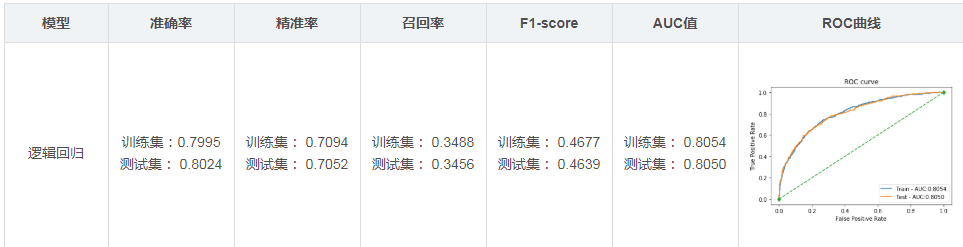

In [150]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

def get_P_R_value(y_true, y_pred):
    """
    :param y_true: 
    :param y_pred: 
    :returns: 
        # ['准确率_score', '精准率_precision', '召回率_recall', 'f1_score'],
        # [score, P, R, F1]
    :raises keyError: raises an exception
    """
    obj = confusion_matrix(y_true, y_pred)
    print('confusion_matrix\n', obj)
    score = (obj[0,0] + obj[1,1])/obj.sum()
    print(f'score, {score:0.4f}')
    P = precision_score(y_true, y_pred)
    R = recall_score(y_true, y_pred)
    F1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    print(f'precision {P:0.4f}, recall {R:0.4f}, f1_score {F1:0.4f}, auc {auc:0.4f}')
    data = dict(zip(
        ['score', 'precision', 'recall', 'f1_score', 'auc'],
        [f'{score:0.4f}',f'{P:0.4f}', f'{R:0.4f}', f'{F1:0.4f}', f'{auc:0.4f}']
    ))
    return data

## 计算评分

In [151]:
data_list = []

In [152]:
clf_xgb = gbm

In [153]:
[i for i in dir() if 'clf' in i]

['clf', 'clf_dt', 'clf_lr', 'clf_model', 'clf_rf', 'clf_svm', 'clf_xgb']

In [154]:
def get_score(clf_model, data_set):
    # clf_model
    # ['clf_dt', 'clf_lr', 'clf_rf', 'clf_svm']
    
    # data_set
    # train, test
    data = {}
    data['clf_model'] = clf_model
    data['data_set'] = data_set
    print(f'{clf_model} >>> {data_set}')
    clf = eval(clf_model)
    y_true = eval('y_%s' % data_set)
    x = eval('x_%s' % data_set)
    data.update(get_P_R_value(y_true, clf.predict(x)))
    return data

In [155]:
for clf_model in ['clf_dt', 'clf_lr', 'clf_rf', 'clf_svm', 'clf_xgb']:
    for data_set in ['train', 'test']:
        data = get_score(clf_model, data_set)
        data_list.append(data)
    print('-' * 30)

clf_dt >>> train
confusion_matrix
 [[2433   46]
 [ 676  171]]
score, 0.7829
precision 0.7880, recall 0.2019, f1_score 0.3214, auc 0.5917
clf_dt >>> test
confusion_matrix
 [[1055   25]
 [ 291   55]]
score, 0.7784
precision 0.6875, recall 0.1590, f1_score 0.2582, auc 0.5679
------------------------------
clf_lr >>> train
confusion_matrix
 [[2362  117]
 [ 548  299]]
score, 0.8001
precision 0.7188, recall 0.3530, f1_score 0.4735, auc 0.6529
clf_lr >>> test
confusion_matrix
 [[1021   59]
 [ 223  123]]
score, 0.8022
precision 0.6758, recall 0.3555, f1_score 0.4659, auc 0.6504
------------------------------
clf_rf >>> train
confusion_matrix
 [[2479    0]
 [  64  783]]
score, 0.9808
precision 1.0000, recall 0.9244, f1_score 0.9607, auc 0.9622
clf_rf >>> test
confusion_matrix
 [[1047   33]
 [ 252   94]]
score, 0.8001
precision 0.7402, recall 0.2717, f1_score 0.3975, auc 0.6206
------------------------------
clf_svm >>> train
confusion_matrix
 [[2460   19]
 [ 728  119]]
score, 0.7754
precision 0

In [156]:
data.keys()

dict_keys(['clf_model', 'data_set', 'score', 'precision', 'recall', 'f1_score', 'auc'])

In [157]:
df = pd.DataFrame(data_list, columns=['clf_model', 'data_set', 'score', 'precision', 'recall', 'f1_score', 'auc'])

In [158]:
df

,clf_model,data_set,score,precision,recall,f1_score,auc
0,clf_dt,train,0.7829,0.7880,0.2019,0.3214,0.5917
1,clf_dt,test,0.7784,0.6875,0.1590,0.2582,0.5679
2,clf_lr,train,0.8001,0.7188,0.3530,0.4735,0.6529
3,clf_lr,test,0.8022,0.6758,0.3555,0.4659,0.6504
4,clf_rf,train,0.9808,1.0000,0.9244,0.9607,0.9622
5,clf_rf,test,0.8001,0.7402,0.2717,0.3975,0.6206
6,clf_svm,train,0.7754,0.8623,0.1405,0.2416,0.5664
7,clf_svm,test,0.7854,0.8226,0.1474,0.2500,0.5686
8,clf_xgb,train,0.8554,0.8765,0.5030,0.6392,0.7394
9,clf_xgb,test,0.8050,0.6848,0.3642,0.4755,0.6552


In [159]:
df.clf_model = df.clf_model.replace(['clf_lr','clf_svm', 'clf_dt',  'clf_rf', 'clf_xgb'],
                    ['逻辑回归', 'SVM', '决策树', '随机森林', 'XGBoost']
)

In [160]:
df.data_set = df.data_set.replace(['train','test', ],
                    ['训练集', '测试集']
)

In [161]:
df.columns

Index(['clf_model', 'data_set', 'score', 'precision', 'recall', 'f1_score',
       'auc'],
      dtype='object')

In [162]:
df.columns = ['模型', '数据集', '准确率', '精准率', '召回率', 'F1_score', 'AUC值']

In [164]:
df.sort_values(['数据集', 'AUC值'], ascending=False)

,模型,数据集,准确率,精准率,召回率,F1_score,AUC值
4,随机森林,训练集,0.9808,1.0000,0.9244,0.9607,0.9622
8,XGBoost,训练集,0.8554,0.8765,0.5030,0.6392,0.7394
2,逻辑回归,训练集,0.8001,0.7188,0.3530,0.4735,0.6529
0,决策树,训练集,0.7829,0.7880,0.2019,0.3214,0.5917
6,SVM,训练集,0.7754,0.8623,0.1405,0.2416,0.5664
9,XGBoost,测试集,0.8050,0.6848,0.3642,0.4755,0.6552
3,逻辑回归,测试集,0.8022,0.6758,0.3555,0.4659,0.6504
5,随机森林,测试集,0.8001,0.7402,0.2717,0.3975,0.6206
7,SVM,测试集,0.7854,0.8226,0.1474,0.2500,0.5686
1,决策树,测试集,0.7784,0.6875,0.1590,0.2582,0.5679


## ROC曲线

In [128]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

In [129]:
clf_model = 'clf_lr'
data_set = 'train'
def get_roc_element(clf_model,data_set):

    clf = eval(clf_model)
    y_true = eval('y_%s' % data_set)
    x = eval('x_%s' % data_set)
    
    if clf_model in ['clf_dt', 'clf_rf']:
        y_probas = cross_val_predict(clf, x, y_true, cv=3, method='predict_proba')
        y_scores = y_probas[:, 1]
    else:
        y_scores = cross_val_predict(clf, x, y_true, cv=3, method='decision_function')
        
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_data = dict(zip(
        ['clf_model', 'data_set', 'fpr', 'tpr', 'thresholds'],
        [clf_model, data_set, fpr, tpr, thresholds]
    ))
    return roc_data

In [130]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth = 2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Postivie Rate')
    plt.ylabel('True Positive Rate')

### LR

In [131]:
clf_model = 'clf_lr'
roc_data_train = get_roc_element(clf_model,'train')
roc_data_test = get_roc_element(clf_model,'test')

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.


Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.


Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.


Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.


Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.


Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    0.7s finished


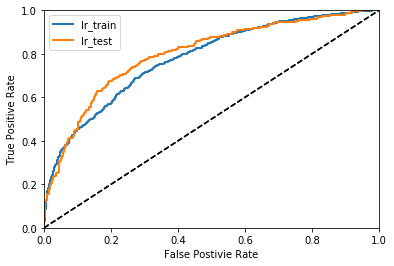

In [132]:
plot_roc_curve(roc_data_train['fpr'], roc_data_train['tpr'], label='lr_train')
plot_roc_curve(roc_data_test['fpr'], roc_data_test['tpr'], label='lr_test')
plt.legend()
plt.show()

### SVM

In [77]:
clf_model = 'clf_svm'
roc_data_train = get_roc_element(clf_model,'train')
roc_data_test = get_roc_element(clf_model,'test')

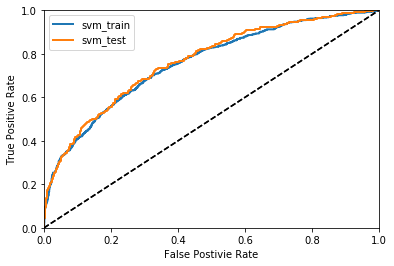

In [78]:
plot_roc_curve(roc_data_train['fpr'], roc_data_train['tpr'], label='svm_train')
plot_roc_curve(roc_data_test['fpr'], roc_data_test['tpr'], label='svm_test')
plt.legend()
plt.show()

### DecisionTree

In [79]:
clf_model = 'clf_dt'
roc_data_train = get_roc_element(clf_model,'train')
roc_data_test = get_roc_element(clf_model,'test')

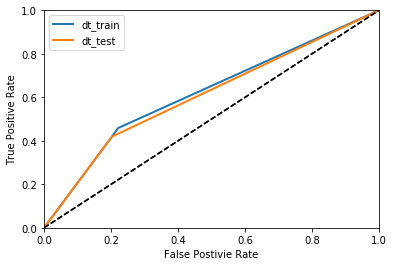

In [80]:
plot_roc_curve(roc_data_train['fpr'], roc_data_train['tpr'], label='dt_train')
plot_roc_curve(roc_data_test['fpr'], roc_data_test['tpr'], label='dt_test')
plt.legend()
plt.show()

### RondomForest

In [81]:
clf_model = 'clf_rf'
roc_data_train = get_roc_element(clf_model,'train')
roc_data_test = get_roc_element(clf_model,'test')

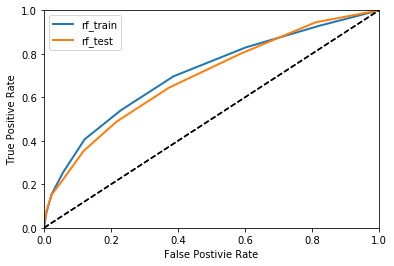

In [82]:
plot_roc_curve(roc_data_train['fpr'], roc_data_train['tpr'], label='rf_train')
plot_roc_curve(roc_data_test['fpr'], roc_data_test['tpr'], label='rf_test')
plt.legend()
plt.show()

### XGboost

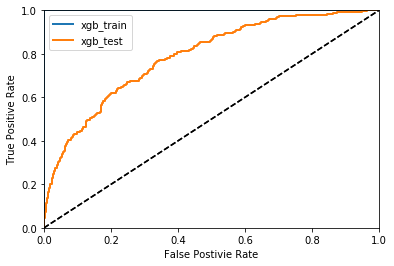

In [83]:
# plt.figure(figsize=(12, 8))
y_train_pred = gbm.predict(xgb.DMatrix(x_train), ntree_limit=gbm.best_iteration+1)
fpr_train, tpr_train, _ = roc_curve(y_train.values, y_train_pred)
plot_roc_curve(fpr_train, tpr_train, label='xgb_train')


y_test_pred = gbm.predict(xgb.DMatrix(x_test), ntree_limit=gbm.best_iteration+1)
fpr_test, tpr_test, _ = roc_curve(y_test.values, y_test_pred)
plot_roc_curve(fpr_test, tpr_test, label='xgb_test')

plt.legend()
plt.show()

# 结果汇总

In [ ]:
plt.figure(figsize=(12, 8))

### LR
clf_model = 'clf_lr'
roc_data_train = get_roc_element(clf_model,'train')
roc_data_test = get_roc_element(clf_model,'test')

plot_roc_curve(roc_data_train['fpr'], roc_data_train['tpr'], label='lr_train')
plot_roc_curve(roc_data_test['fpr'], roc_data_test['tpr'], label='lr_test')

### SVM
clf_model = 'clf_svm'
roc_data_train = get_roc_element(clf_model,'train')
roc_data_test = get_roc_element(clf_model,'test')

plot_roc_curve(roc_data_train['fpr'], roc_data_train['tpr'], label='svm_train')
plot_roc_curve(roc_data_test['fpr'], roc_data_test['tpr'], label='svm_test')

### DecisionTree

clf_model = 'clf_dt'
roc_data_train = get_roc_element(clf_model,'train')
roc_data_test = get_roc_element(clf_model,'test')

plot_roc_curve(roc_data_train['fpr'], roc_data_train['tpr'], label='dt_train')
plot_roc_curve(roc_data_test['fpr'], roc_data_test['tpr'], label='dt_test')


### RondomForest

clf_model = 'clf_rf'
roc_data_train = get_roc_element(clf_model,'train')
roc_data_test = get_roc_element(clf_model,'test')

plot_roc_curve(roc_data_train['fpr'], roc_data_train['tpr'], label='rf_train')
plot_roc_curve(roc_data_test['fpr'], roc_data_test['tpr'], label='rf_test')

In [134]:
### XGboost

# clf_model = 'clf_xgb'
# roc_data_train = get_roc_element(clf_model,'train')
# roc_data_test = get_roc_element(clf_model,'test')

# plot_roc_curve(roc_data_train['fpr'], roc_data_train['tpr'], label='xgb_train')
# plot_roc_curve(roc_data_test['fpr'], roc_data_test['tpr'], label='xgb_test')


# # y_train_pred = gbm.predict(xgb.DMatrix(x_train), ntree_limit=gbm.best_iteration+1)
# # fpr_train, tpr_train, _ = roc_curve(y_train.values, y_train_pred)
# # plot_roc_curve(fpr_train, tpr_train, label='xgb_train')

# # y_test_pred = gbm.predict(xgb.DMatrix(x_test), ntree_limit=gbm.best_iteration+1)
# # fpr_test, tpr_test, _ = roc_curve(y_test.values, y_test_pred)
# # plot_roc_curve(fpr_test, tpr_test, label='xgb_test')

# plt.legend()
# plt.show()

In [149]:
df.query('数据集 == "测试集"').sort_values(['AUC值'], ascending=False)

,模型,数据集,准确率,精准率,召回率,F1_score,AUC值
9,XGBoost,测试集,0.8050,0.6848,0.3642,0.4755,0.6552
3,逻辑回归,测试集,0.7973,0.6792,0.3121,0.4277,0.6325
5,随机森林,测试集,0.7987,0.7323,0.2688,0.3932,0.6187
7,SVM,测试集,0.7854,0.8226,0.1474,0.2500,0.5686
1,决策树,测试集,0.7784,0.6875,0.1590,0.2582,0.5679


## 汇总

In [140]:
clf_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [141]:
clf_svm = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [142]:
clf_dt =DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [143]:
clf_rf = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=90, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [144]:
# 	learning_rate: 0.01
# 	max_depth: 5
# 	min_child_weight: 10
# 	n_estimators: 500

clf_xgb = xgb.XGBClassifier(
        max_depth=5,
        learning_rate=0.01,
        n_estimators=500,              
        silent=True,
        objective='binary:logistic',
        nthread=-1,
        gamma=0,
        min_child_weight=10,
        max_delta_step=0,
        subsample=0.85,
        colsample_bytree=0.7,
        colsample_bylevel=1,
        reg_alpha=0,
        reg_lambda=1,
        scale_pos_weight=1,
        seed=1440,
        missing=None)

clf_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=10, missing=None, n_estimators=500, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1440,
              silent=True, subsample=0.85, verbosity=1)

In [145]:
for clf in [clf_lr, clf_svm, clf_dt, clf_rf, clf_xgb]:
    clf.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 计算评分

In [166]:
data_list = []
def get_score(clf_model, data_set):
    # clf_model
    # ['clf_dt', 'clf_lr', 'clf_rf', 'clf_svm']
    
    # data_set
    # train, test
    data = {}
    data['clf_model'] = clf_model
    data['data_set'] = data_set
    print(f'{clf_model} >>> {data_set}')
    clf = eval(clf_model)
    y_true = eval('y_%s' % data_set)
    x = eval('x_%s' % data_set)
    data.update(get_P_R_value(y_true, clf.predict(x)))
    return data

for clf_model in ['clf_dt', 'clf_lr', 'clf_rf', 'clf_svm', 'clf_xgb']:
    for data_set in ['train', 'test']:
        data = get_score(clf_model, data_set)
        data_list.append(data)
    print('-' * 30)


df = pd.DataFrame(data_list, columns=['clf_model', 'data_set', 'score', 'precision', 'recall', 'f1_score', 'auc'])

df.clf_model = df.clf_model.replace(['clf_lr','clf_svm', 'clf_dt',  'clf_rf', 'clf_xgb'],
                    ['逻辑回归', 'SVM', '决策树', '随机森林', 'XGBoost']
)
df.data_set = df.data_set.replace(['train','test', ],
                    ['训练集', '测试集']
)

df.columns = ['模型', '数据集', '准确率', '精准率', '召回率', 'F1_score', 'AUC值']

df.sort_values(['数据集', 'AUC值'], ascending=False)

clf_dt >>> train
confusion_matrix
 [[2433   46]
 [ 676  171]]
score, 0.7829
precision 0.7880, recall 0.2019, f1_score 0.3214, auc 0.5917
clf_dt >>> test
confusion_matrix
 [[1055   25]
 [ 291   55]]
score, 0.7784
precision 0.6875, recall 0.1590, f1_score 0.2582, auc 0.5679
------------------------------
clf_lr >>> train
confusion_matrix
 [[2362  117]
 [ 548  299]]
score, 0.8001
precision 0.7188, recall 0.3530, f1_score 0.4735, auc 0.6529
clf_lr >>> test
confusion_matrix
 [[1021   59]
 [ 223  123]]
score, 0.8022
precision 0.6758, recall 0.3555, f1_score 0.4659, auc 0.6504
------------------------------
clf_rf >>> train
confusion_matrix
 [[2479    0]
 [  64  783]]
score, 0.9808
precision 1.0000, recall 0.9244, f1_score 0.9607, auc 0.9622
clf_rf >>> test
confusion_matrix
 [[1047   33]
 [ 252   94]]
score, 0.8001
precision 0.7402, recall 0.2717, f1_score 0.3975, auc 0.6206
------------------------------
clf_svm >>> train
confusion_matrix
 [[2460   19]
 [ 728  119]]
score, 0.7754
precision 0

,模型,数据集,准确率,精准率,召回率,F1_score,AUC值
4,随机森林,训练集,0.9808,1.0000,0.9244,0.9607,0.9622
8,XGBoost,训练集,0.8554,0.8765,0.5030,0.6392,0.7394
2,逻辑回归,训练集,0.8001,0.7188,0.3530,0.4735,0.6529
0,决策树,训练集,0.7829,0.7880,0.2019,0.3214,0.5917
6,SVM,训练集,0.7754,0.8623,0.1405,0.2416,0.5664
9,XGBoost,测试集,0.8050,0.6848,0.3642,0.4755,0.6552
3,逻辑回归,测试集,0.8022,0.6758,0.3555,0.4659,0.6504
5,随机森林,测试集,0.8001,0.7402,0.2717,0.3975,0.6206
7,SVM,测试集,0.7854,0.8226,0.1474,0.2500,0.5686
1,决策树,测试集,0.7784,0.6875,0.1590,0.2582,0.5679


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


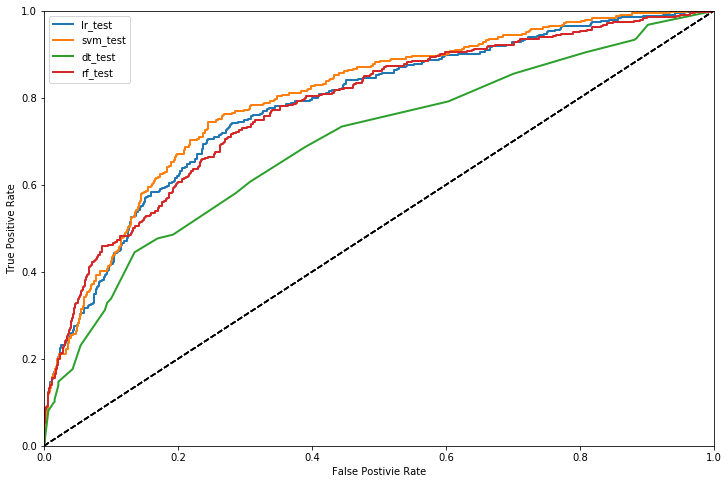

In [148]:
plt.figure(figsize=(12, 8))

### LR
clf_model = 'clf_lr'
# roc_data_train = get_roc_element(clf_model,'train')
roc_data_test = get_roc_element(clf_model,'test')

# plot_roc_curve(roc_data_train['fpr'], roc_data_train['tpr'], label='lr_train')
plot_roc_curve(roc_data_test['fpr'], roc_data_test['tpr'], label='lr_test')

### SVM
clf_model = 'clf_svm'
# roc_data_train = get_roc_element(clf_model,'train')
roc_data_test = get_roc_element(clf_model,'test')

# plot_roc_curve(roc_data_train['fpr'], roc_data_train['tpr'], label='svm_train')
plot_roc_curve(roc_data_test['fpr'], roc_data_test['tpr'], label='svm_test')

### DecisionTree

clf_model = 'clf_dt'
# roc_data_train = get_roc_element(clf_model,'train')
roc_data_test = get_roc_element(clf_model,'test')

# plot_roc_curve(roc_data_train['fpr'], roc_data_train['tpr'], label='dt_train')
plot_roc_curve(roc_data_test['fpr'], roc_data_test['tpr'], label='dt_test')


### RondomForest

clf_model = 'clf_rf'
roc_data_train = get_roc_element(clf_model,'train')
roc_data_test = get_roc_element(clf_model,'test')

# plot_roc_curve(roc_data_train['fpr'], roc_data_train['tpr'], label='rf_train')
plot_roc_curve(roc_data_test['fpr'], roc_data_test['tpr'], label='rf_test')

plt.legend()
plt.show()

## 输出

In [167]:
cond = df.数据集 == "测试集"
df[cond].sort_values(['数据集', 'AUC值'], ascending=False)

,模型,数据集,准确率,精准率,召回率,F1_score,AUC值
9,XGBoost,测试集,0.8050,0.6848,0.3642,0.4755,0.6552
3,逻辑回归,测试集,0.8022,0.6758,0.3555,0.4659,0.6504
5,随机森林,测试集,0.8001,0.7402,0.2717,0.3975,0.6206
7,SVM,测试集,0.7854,0.8226,0.1474,0.2500,0.5686
1,决策树,测试集,0.7784,0.6875,0.1590,0.2582,0.5679


In [168]:
cond = df.数据集 == "测试集"
df[cond].sort_values(['数据集', 'AUC值'], ascending=False).head(3)['模型'].to_list()

['XGBoost', '逻辑回归', '随机森林']

选用 ['XGBoost', '逻辑回归', '随机森林']

In [140]:
clf_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [143]:
clf_rf = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=90, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [144]:
# 	learning_rate: 0.01
# 	max_depth: 5
# 	min_child_weight: 10
# 	n_estimators: 500

clf_xgb = xgb.XGBClassifier(
        max_depth=5,
        learning_rate=0.01,
        n_estimators=500,              
        silent=True,
        objective='binary:logistic',
        nthread=-1,
        gamma=0,
        min_child_weight=10,
        max_delta_step=0,
        subsample=0.85,
        colsample_bytree=0.7,
        colsample_bylevel=1,
        reg_alpha=0,
        reg_lambda=1,
        scale_pos_weight=1,
        seed=1440,
        missing=None)

clf_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=10, missing=None, n_estimators=500, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1440,
              silent=True, subsample=0.85, verbosity=1)

In [145]:
for clf in [clf_lr, clf_rf, clf_xgb]:
    clf.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
